# get Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings

## Add column names to view data structures

##快速查看数据结构

In [2]:
pricing = pd.read_csv("Pricing.csv",header=0, names=['1','price','3','4','property type','6','estate type','8','9','10','11','town or city','13','14','15','16'])
pricing.head(6)

,1,price,3,4,property type,6,estate type,8,9,10,11,town or city,13,14,15,16
0,{1BA349E3-2579-40D6-999E-49E2A25D2284},73450,1995-10-09 00:00,L26 7XJ,D,Y,F,6,NaN,CATKIN ROAD,LIVERPOOL,LIVERPOOL,KNOWSLEY,MERSEYSIDE,A,A
1,{E5B50DCB-BC7A-4E54-B167-49E2A6B4148B},59000,1995-03-31 00:00,BH12 2AE,D,N,F,28,NaN,ALDER ROAD,POOLE,POOLE,POOLE,POOLE,A,A
2,{81E50116-D675-4B7F-9F8D-49E2B5D43271},31000,1995-12-04 00:00,IP13 0DR,D,Y,F,NONSUCH COTTAGE,NaN,THE STREET,HACHESTON,WOODBRIDGE,SUFFOLK COASTAL,SUFFOLK,A,A
3,{B97455B9-75CB-40BB-A615-42C53683E143},95000,1995-09-22 00:00,WS14 0BE,D,N,F,FOX COVER COTTAGE,NaN,HALL LANE,LICHFIELD,LICHFIELD,LICHFIELD,STAFFORDSHIRE,A,A
4,{F0D1E8DA-C00D-467A-A41C-42C5378DB6E0},45450,1995-02-28 00:00,S42 5GA,S,Y,F,109,NaN,ELVASTON ROAD,NORTH WINGFIELD,CHESTERFIELD,NORTH EAST DERBYSHIRE,DERBYSHIRE,A,A
5,{7DAC48DA-D479-4922-86B0-42C5580DFC67},96000,1995-10-27 00:00,KT17 2DU,S,N,F,82,NaN,KINGSTON ROAD,EPSOM,EPSOM,EPSOM AND EWELL,SURREY,A,A


Because of the large amount of data, delete the useless columns first

In [3]:
# delete useless column
df=pricing.copy()

del df['4']
del df['6']
del df['8']
del df['9']
del df['10']
del df['11']
del df['13']
del df['14']
del df['15']
del df['16']

In [4]:
df

,1,price,3,property type,estate type,town or city
0,{1BA349E3-2579-40D6-999E-49E2A25D2284},73450,1995-10-09 00:00,D,F,LIVERPOOL
1,{E5B50DCB-BC7A-4E54-B167-49E2A6B4148B},59000,1995-03-31 00:00,D,F,POOLE
2,{81E50116-D675-4B7F-9F8D-49E2B5D43271},31000,1995-12-04 00:00,D,F,WOODBRIDGE
3,{B97455B9-75CB-40BB-A615-42C53683E143},95000,1995-09-22 00:00,D,F,LICHFIELD
4,{F0D1E8DA-C00D-467A-A41C-42C5378DB6E0},45450,1995-02-28 00:00,S,F,CHESTERFIELD
...,...,...,...,...,...,...
25836870,{BA558B32-A742-76EF-E053-6B04A8C0B4B7},492500,2021-01-20 00:00,D,F,CANTERBURY
25836871,{BA558B32-A7BC-76EF-E053-6B04A8C0B4B7},425000,2021-01-07 00:00,S,F,CANTERBURY
25836872,{BA558B32-A7EE-76EF-E053-6B04A8C0B4B7},425000,2021-01-07 00:00,T,F,CANTERBURY
25836873,{BA558B32-A841-76EF-E053-6B04A8C0B4B7},620000,2021-01-08 00:00,D,F,CANTERBURY


<!-- price 数字类型，其余全是object类型 -->

In [5]:
# Price is a number, and the rest of the data is all object types

In [6]:
import datetime as dt
df['3'] = pd.to_datetime(df['3'])
dfBefore = df[df['3'].dt.year == 2015]
dfAfter = df[df['3'].dt.year == 2020]

df = dfBefore.append(dfAfter)

Value_counts () looks at how many classifications exist in attributes of type Object

In [7]:
df["property type"].value_counts()

T    485272
S    439625
D    396827
F    306932
O     56227
Name: property type, dtype: int64

In [8]:
df["estate type"].value_counts()

F    1283990
L     400893
Name: estate type, dtype: int64

In [9]:
df["town or city"].value_counts()

LONDON          120067
MANCHESTER       28248
BRISTOL          26342
BIRMINGHAM       24102
NOTTINGHAM       22567
                 ...  
MARIANGLAS           4
GATWICK              3
DULAS                3
MINDRUM              2
BILLINGHURST         1
Name: town or city, Length: 1149, dtype: int64

Show property summary

In [10]:
df.describe()

,price
count,1.684883e+06
mean,3.234454e+05
std,1.259022e+06
min,1.000000e+00
25%,1.400000e+05
50%,2.200000e+05
75%,3.410000e+05
max,3.052110e+08


# explore data

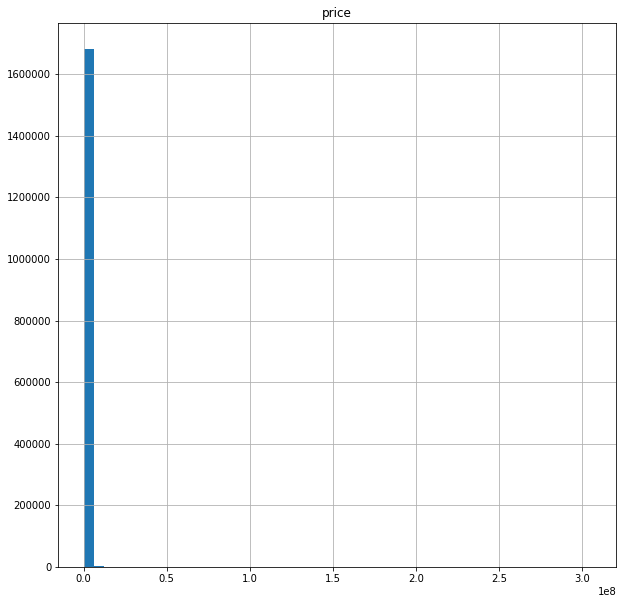

In [11]:
df.hist(bins=50,figsize=(10,10))
plt.show()

# Data preprocessing

Determine if there is a duplicate value

In [12]:
df.duplicated().any()

False

In [13]:
##Switch the city to is_London(1/0)
def fun(x):
    if  x == 'LONDON':
        return  1
    else :
        return  0
 
values= df['town or city'].apply(lambda x: fun(x))
#If the change needs to be assigned to a column of the original Feature, it can be assigned once
df['town or city']=values

In [14]:
df

,1,price,3,property type,estate type,town or city
20011431,{773788C2-338C-2CE4-E053-6C04A8C05E57},509000,2015-09-30,F,L,0
20011432,{773788C2-389C-2CE4-E053-6C04A8C05E57},950000,2015-08-13,T,F,0
20011433,{773788C2-490F-2CE4-E053-6C04A8C05E57},167000,2015-04-30,F,L,0
20011434,{773788C2-9509-2CE4-E053-6C04A8C05E57},124950,2015-07-22,S,L,0
20011435,{773788C2-98AF-2CE4-E053-6C04A8C05E57},180000,2015-06-01,S,F,0
...,...,...,...,...,...,...
25836435,{A96E4ACC-200F-9205-E053-6C04A8C0DA09},692500,2020-04-15,D,F,0
25836436,{A96E4ACC-2010-9205-E053-6C04A8C0DA09},285000,2020-03-25,D,F,0
25836437,{A96E4ACC-2012-9205-E053-6C04A8C0DA09},280000,2020-03-27,F,L,0
25836438,{A96E4ACC-2013-9205-E053-6C04A8C0DA09},124000,2020-03-20,F,L,0


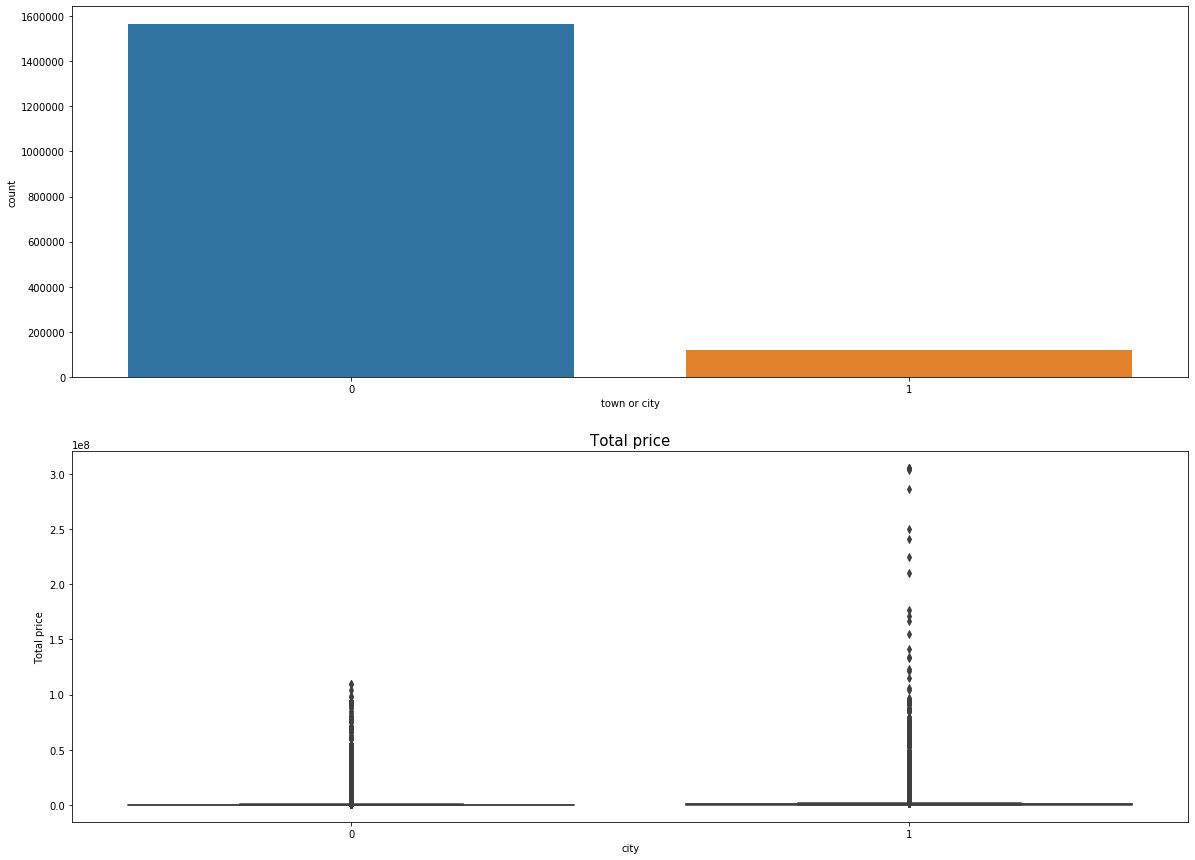

In [15]:
df_house_count = df.groupby('town or city')['price'].count().sort_values(ascending=False).to_frame().reset_index()

f, [ax2,ax3] = plt.subplots(2,1,figsize=(20,15))
sns.countplot(df['town or city'], ax=ax2)
sns.boxplot(x='town or city', y='price', data=df, ax=ax3)
ax3.set_title('Total price',fontsize=15)
ax3.set_xlabel('city')
ax3.set_ylabel('Total price')
plt.show()

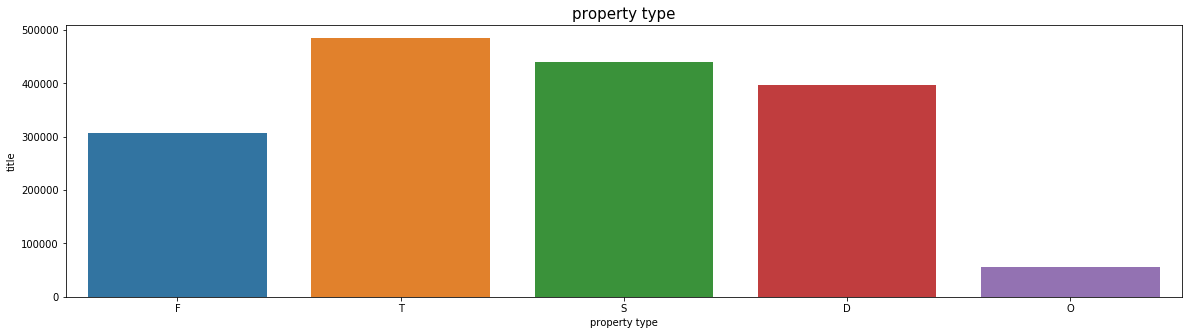

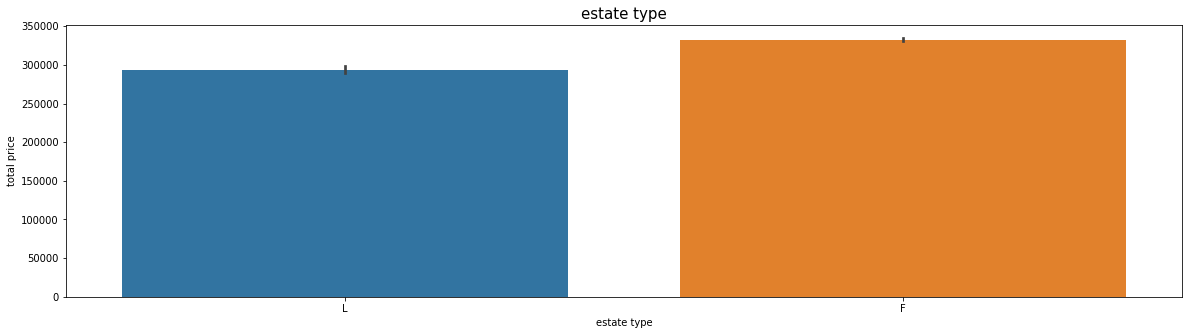

In [16]:
f, ax1= plt.subplots(figsize=(20,5))
sns.countplot(x='property type', data=df, ax=ax1)
ax1.set_title('property type',fontsize=15)
ax1.set_xlabel('property type')
ax1.set_ylabel('title')
f, ax2 = plt.subplots(figsize=(20, 5))
sns.barplot(x='estate type', y='price', data=df, ax=ax2)
ax2.set_title('estate type',fontsize=15)
ax2.set_xlabel('estate type')
ax2.set_ylabel('total price')
plt.show()

# Data preprocessing

Convert property type and estate type to dummy variables. Because they are discrete and disordered.

In [17]:
df=pd.get_dummies(data=df, columns=['property type'])
df=pd.get_dummies(data=df, columns=['estate type'])

In [18]:
df

,1,price,3,town or city,property type_D,property type_F,property type_O,property type_S,property type_T,estate type_F,estate type_L
20011431,{773788C2-338C-2CE4-E053-6C04A8C05E57},509000,2015-09-30,0,0,1,0,0,0,0,1
20011432,{773788C2-389C-2CE4-E053-6C04A8C05E57},950000,2015-08-13,0,0,0,0,0,1,1,0
20011433,{773788C2-490F-2CE4-E053-6C04A8C05E57},167000,2015-04-30,0,0,1,0,0,0,0,1
20011434,{773788C2-9509-2CE4-E053-6C04A8C05E57},124950,2015-07-22,0,0,0,0,1,0,0,1
20011435,{773788C2-98AF-2CE4-E053-6C04A8C05E57},180000,2015-06-01,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
25836435,{A96E4ACC-200F-9205-E053-6C04A8C0DA09},692500,2020-04-15,0,1,0,0,0,0,1,0
25836436,{A96E4ACC-2010-9205-E053-6C04A8C0DA09},285000,2020-03-25,0,1,0,0,0,0,1,0
25836437,{A96E4ACC-2012-9205-E053-6C04A8C0DA09},280000,2020-03-27,0,0,1,0,0,0,0,1
25836438,{A96E4ACC-2013-9205-E053-6C04A8C0DA09},124000,2020-03-20,0,0,1,0,0,0,0,1


In [19]:
df.columns.values.tolist()

['1',
 'price',
 '3',
 'town or city',
 'property type_D',
 'property type_F',
 'property type_O',
 'property type_S',
 'property type_T',
 'estate type_F',
 'estate type_L']

# Create data set

In [20]:
import datetime as dt
df['3'] = pd.to_datetime(df['3'])
dfBefore = df[df['3'].dt.year == 2015]
dfAfter = df[df['3'].dt.year == 2020]

In [21]:
dfBefore.head(6)

,1,price,3,town or city,property type_D,property type_F,property type_O,property type_S,property type_T,estate type_F,estate type_L
20011431,{773788C2-338C-2CE4-E053-6C04A8C05E57},509000,2015-09-30,0,0,1,0,0,0,0,1
20011432,{773788C2-389C-2CE4-E053-6C04A8C05E57},950000,2015-08-13,0,0,0,0,0,1,1,0
20011433,{773788C2-490F-2CE4-E053-6C04A8C05E57},167000,2015-04-30,0,0,1,0,0,0,0,1
20011434,{773788C2-9509-2CE4-E053-6C04A8C05E57},124950,2015-07-22,0,0,0,0,1,0,0,1
20011435,{773788C2-98AF-2CE4-E053-6C04A8C05E57},180000,2015-06-01,0,0,0,0,1,0,1,0
20011436,{773788C2-B470-2CE4-E053-6C04A8C05E57},133000,2015-07-17,0,1,0,0,0,0,1,0


In [22]:
dfAfter.head(6)

,1,price,3,town or city,property type_D,property type_F,property type_O,property type_S,property type_T,estate type_F,estate type_L
25161510,{AE4D86D3-FFFF-4619-E053-6C04A8C03CD0},220000,2020-07-24,0,1,0,0,0,0,1,0
25161511,{AE4D86D4-0000-4619-E053-6C04A8C03CD0},370000,2020-06-03,0,0,0,0,1,0,1,0
25161512,{AE4D86D4-0001-4619-E053-6C04A8C03CD0},385000,2020-06-26,0,0,1,0,0,0,0,1
25161513,{AE4D86D4-0002-4619-E053-6C04A8C03CD0},175000,2020-07-17,0,0,1,0,0,0,0,1
25161514,{AE4D86D4-0003-4619-E053-6C04A8C03CD0},475000,2020-07-10,0,1,0,0,0,0,1,0
25161515,{AE4D86D4-0004-4619-E053-6C04A8C03CD0},195750,2020-06-05,0,0,1,0,0,0,0,1


# Create the model

C:\Users\87420\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\87420\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


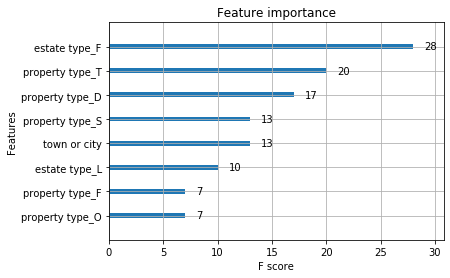

In [23]:
import xgboost as xgb
from xgboost import plot_importance

x_train = dfBefore[[
 'town or city',
 'property type_D',
 'property type_F',
 'property type_O',
 'property type_S',
 'property type_T',
 'estate type_F',
 'estate type_L',
 ]]

y_train = dfBefore["price"]

x_test = dfAfter[[
 'town or city',
 'property type_D',
 'property type_F',
 'property type_O',
 'property type_S',
 'property type_T',
 'estate type_F',
 'estate type_L',
]]

y_test = dfAfter["price"]

dtrain = xgb.DMatrix(x_train, y_train)
dtest = xgb.DMatrix(x_test)
param = {'num_round': 1000, 
         'gamma': 0.1,
        'max_depth': 5,
        'lambda': 3,
        'subsample': 0.7,
        'colsample_bytree': 0.7,
        'min_child_weight': 3,
        'silent': 1,
        'eta': 0.1,
        'seed': 1000,
        'nthread': 4, }
# 对测试集进行预测
bst = xgb.train(param, dtrain)

ans = bst.predict(dtest)


# 显示重要特征
plot_importance(bst)
plt.show()

# Evaluation

In [24]:
# MAE 
##  It is used to evaluate the degree to which the predicted result is close to the real data set. The smaller its value is, the better the fitting effect is
# MSE 
## This indicator calculates the mean of the sum of squares of the errors of sample points corresponding to the fitting data and the original data. The smaller the value, the better the fitting effect.
# MedianAE 
## This method is very suitable for data sets containing outliers, the smaller the better

# EVS 
## explains the variance score of the regression model, and its value range is [0,1]. The closer it is to 1, the more able the independent variable is to explain the variance change of the dependent variable; the smaller the value, the worse the effect.
# R2 
## The value range is [0,1]. The closer it is to 1, the more able the independent variable is to explain the variance change of the dependent variable. The smaller the value is, the worse the effect is.


from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score,median_absolute_error,r2_score

MAE = mean_absolute_error(y_test,ans)
MSE = mean_squared_error(y_test,ans)
EVS = explained_variance_score(y_test,ans)
Median_AE = median_absolute_error(y_test,ans)
R2  = r2_score(y_test,ans)
print('\tMAE\t{}\n\tMSE \t\t{}\n\tMedianAE \t{}\n\tEVS  \t{}\n\tR2  \t{}'.format(
    MAE,MSE,Median_AE,EVS,R2))

	MAE	222558.62271454307
	MSE 		2543519566743.7734
	MedianAE 	87958.28125
	EVS  	0.0354530261804058
	R2  	0.02749099018791934
